# Análisis exploratorio de datos

## Librerias

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime, time
import seaborn as sns
import plotly.graph_objects as go

## Lectura de datos

In [35]:
df = pd.read_excel('./data/dieta-codorniz.xlsx')
df.head()

id edad    sexo estado  peso total  Oxalis  Quercus  Cyp.bulb  \
0  2014-104    J  Female     NM      9.7584  9.7584      0.0     0.000   
1  2014-105    J    Male     NM      3.9632  3.9632      0.0     0.000   
2  2016-133    A  Female     AZ      5.4562  3.8238      0.0     0.000   
3   2014-28    J  Female     NM      4.4976  3.7076      0.0     0.000   
4  2016-132    J    Male     AZ      5.4630  2.2011      0.0     0.778   

   Phaseolus  Tephoria  ...  covey  dist camino  ppanual17   tmedia17  \
0     0.0000    0.0000  ...    6.0       251.86      462.0   7.054167   
1     0.0000    0.0000  ...    6.0       251.86      462.0   7.054167   
2     0.6148    0.0726  ...   10.0       574.06      515.0  15.954167   
3     0.0000    0.0000  ...    8.0        23.07      385.0  10.979167   
4     0.3908    0.0000  ...    8.0       236.76      521.0  16.133333   

   altitud        lat         lon     hcrop     hland  \
0   2518.0  34.037969 -108.963777  0.000000  0.798600   
1   2518.0  34.037969 -108.963777  0.000000  0.798600   
2   1527.0  31.375725 -110.530491  0.785803  1.245916   
3   1952.0  33.176791 -107.735593  0.464732  0.764466   
4   1507.0  31.353053 -110.531060  1.680150  1.541562   

                                           gap  
0       Rocky Mountain Ponderosa Pine Woodland  
1       Rocky Mountain Ponderosa Pine Woodland  
2                              Madrean Encinal  
3     Colorado Plateau Pinyon-Juniper Woodland  
4  Apacherian-Chihuahuan Mesquite Upland Scrub  

[5 rows x 146 columns]

## Descripción de los Datos

In [36]:
columns = list(df.columns)
print(columns)

['id', 'edad', 'sexo', 'estado', 'peso total', 'Oxalis', 'Quercus', 'Cyp.bulb', 'Phaseolus', 'Tephoria', 'Caracoles', 'Insectos', 'Physalis', 'Vitis.arizonica', 'Lupinus', 'Lotus.wrightii', 'Cyp.rizo', 'Commelina.dianthifolia', 'Kallstroemia.parviflora', 'Fabacea', 'Ipomoea', 'Desmodium', 'Euphorbia probably E. bilobata', 'Talinum.aurantiacum', 'SP17', 'Heterosperma.pinnatum', 'SP19', 'Desmanthus cooleyi', 'Celtis.reticulata', 'Panicum.hirticaule', 'Setaria', 'Malvacea', 'Cyperus.fendlerianus', 'SP26', 'Setaria.1', 'SP28', 'Cryptantha.cinerea', 'Sphaeralcea.fendleri', 'Hymenopappus.flavescens', 'Solaneaceae', 'Euphorbia', 'SP34', 'Piptochaetium.fimbriatum', 'Acalypha.neomexiacana', 'Fabaceae', 'Lupinus.neomexicanus', 'Mirabilis.longiflora', 'SP44', 'Prunus.virginiana', 'SP46', 'Urochloa', 'Cyperaceae', 'Pinus.edulis', 'Fabacea.1', 'SP51', 'SP52', 'Calliandra.humilis', 'Fabaceae.1', 'Solanum', 'Calliandra.eriophylla', 'Desmanthus.cooleyi', 'Sp59', 'Croton.pottsii', 'Lupinus.1', 'Polygon

**Variables:** ['id', 'edad', 'sexo', 'estado', 'peso total', 'Oxalis', 'Quercus', 'Cyp.bulb', 'Phaseolus', 'Tephoria', 'Caracoles', 'Insectos', 'Physalis', 'Vitis.arizonica', 'Lupinus', 'Lotus.wrightii', 'Cyp.rizo', 'Commelina.dianthifolia', 'Kallstroemia.parviflora', 'Fabacea', 'Ipomoea', 'Desmodium', 'Euphorbia probably E. bilobata', 'Talinum.aurantiacum', 'SP17', 'Heterosperma.pinnatum', 'SP19', 'Desmanthus cooleyi', 'Celtis.reticulata', 'Panicum.hirticaule', 'Setaria', 'Malvacea', 'Cyperus.fendlerianus', 'SP26', 'Setaria.1', 'SP28', 'Cryptantha.cinerea', 'Sphaeralcea.fendleri', 'Hymenopappus.flavescens', 'Solaneaceae', 'Euphorbia', 'SP34', 'Piptochaetium.fimbriatum', 'Acalypha.neomexiacana', 'Fabaceae', 'Lupinus.neomexicanus', 'Mirabilis.longiflora', 'SP44', 'Prunus.virginiana', 'SP46', 'Urochloa', 'Cyperaceae', 'Pinus.edulis', 'Fabacea.1', 'SP51', 'SP52', 'Calliandra.humilis', 'Fabaceae.1', 'Solanum', 'Calliandra.eriophylla', 'Desmanthus.cooleyi', 'Sp59', 'Croton.pottsii', 'Lupinus.1', 'Polygonaceae', 'Euphorbia.1', 'Calliandra', 'Solanum.1', 'SPA1', 'SPA2', 'Lotus', 'Bidens.leptocephala', 'SPA5', 'SPA6', 'Tephrosia', 'Asteraceae.Uropappus lindleyi', 'SPA9', 'SPA10', 'Ziziphus.obtisufolia', 'Aristida', 'Diodia.teres', 'Bothriochloa', 'Pinus.dulis', 'Paspalum.distichum', 'SPA17', 'SPA18', 'SPA19', 'Euphorbia.exstipulata', 'SPA21', 'Asteracea', 'SPA23', 'SPA24', 'Chilopsis.linearis', 'Sorghum.halepense', 'Amaranthus', 'Setaria nigricans', 'SPA29', 'SPA30', 'SPA31', 'SPA32', 'SPA33', 'SPA34', 'SPA35', 'SPA36', 'SPA37', 'SPA38', 'SPA39', 'SPA40', 'Agave.or.Yucca', 'SPA42', 'SPA43', 'SPA44', 'Sida', 'SPA46', 'SPA47', 'Tragia', 'Lupinus.2', 'SPA50', 'SPA51', 'SPA52', 'SPA53', 'SPA54', 'SPA55', 'Amaranthus.1', 'Desmodium.1', 'Bothriochloa.1', 'Euphorbia.2', 'SPA60', 'SPA61', 'SPA62', 'Phaseolus.1', 'SPA64', 'SPA65', 'Arachnida', 'Juniperus prob. deppeana', 'time', 'covey', 'dist camino', 'ppanual17', 'tmedia17', 'altitud', 'lat', 'lon', 'hcrop', 'hland', 'gap']

In [40]:
df.describe()

peso total      Oxalis     Quercus    Cyp.bulb   Phaseolus    Tephoria  \
count  319.000000  319.000000  318.000000  317.000000  319.000000  319.000000   
mean     2.084231    0.097181    0.391575    0.194748    0.319146    0.014456   
std      1.718818    0.681455    0.873040    0.626539    1.021837    0.054934   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.704350    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.776000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      3.001150    0.000000    0.134650    0.000000    0.091750    0.000000   
max      9.758400    9.758400    4.382100    6.723300    7.326500    0.666200   

        Caracoles    Insectos    Physalis  Vitis.arizonica  ...         time  \
count  319.000000  319.000000  319.000000       319.000000  ...   232.000000   
mean     0.000230    0.113014    0.035234         0.008553  ...  1327.995690   
std      0.002218    0.384408    0.303878         0.094990  ...   227.468822   
min      0.000000    0.000000    0.000000         0.000000  ...   835.000000   
25%      0.000000    0.000000    0.000000         0.000000  ...  1130.000000   
50%      0.000000    0.000000    0.000000         0.000000  ...  1365.000000   
75%      0.000000    0.030000    0.000000         0.000000  ...  1530.000000   
max      0.027800    2.900000    4.471900         1.666400  ...  1700.000000   

            covey  dist camino   ppanual17    tmedia17      altitud  \
count  190.000000   221.000000  221.000000  221.000000   221.000000   
mean     9.178947   207.466742  436.755656   13.860351  1709.475113   
std      3.779586   178.331358   78.965781    2.093009   224.818989   
min      1.000000     6.400000  235.000000    7.054167  1206.000000   
25%      6.000000    81.820000  376.000000   12.379167  1567.000000   
50%     10.000000   171.920000  422.000000   14.354167  1658.000000   
75%     12.000000   272.860000  518.000000   15.537500  1901.000000   
max     20.000000   774.840000  620.000000   17.312500  2518.000000   

              lat         lon       hcrop       hland  
count  221.000000  221.000000  319.000000  220.000000  
mean    32.221751 -108.935298    0.645314    1.044265  
std      0.815692    1.534481    0.528932    0.360545  
min     31.343850 -111.072099    0.000000    0.222691  
25%     31.479233 -110.585248    0.181204    0.783493  
50%     31.791366 -108.940734    0.579030    1.057318  
75%     32.894714 -107.723281    0.963353    1.362937  
max     34.037969 -105.354701    2.318525    1.796301  

[8 rows x 141 columns]

### Duplicado de datos

In [43]:
# Verifica si existen registros duplicados
df.duplicated().value_counts()

False    319
Name: count, dtype: int64

### Datos Faltantes

In [44]:
# Verificar si hay datos faltantes o nulos en cada columna
missing_data = df.isnull().sum()

# Filtrar las columnas que tienen datos faltantes
missing_columns = missing_data[missing_data > 0]

# Mostrar el número de valores faltantes por columna
print(missing_columns)

# Verificar si hay alguna columna con datos faltantes
has_missing_data = missing_data.any()

edad               87
sexo               42
Quercus             1
Cyp.bulb            2
Lotus.wrightii      1
Fabacea             1
SP34                1
SPA33               1
SPA55               2
Bothriochloa.1      1
time               87
covey             129
dist camino        98
ppanual17          98
tmedia17           98
altitud            98
lat                98
lon                98
hland              99
gap                98
dtype: int64


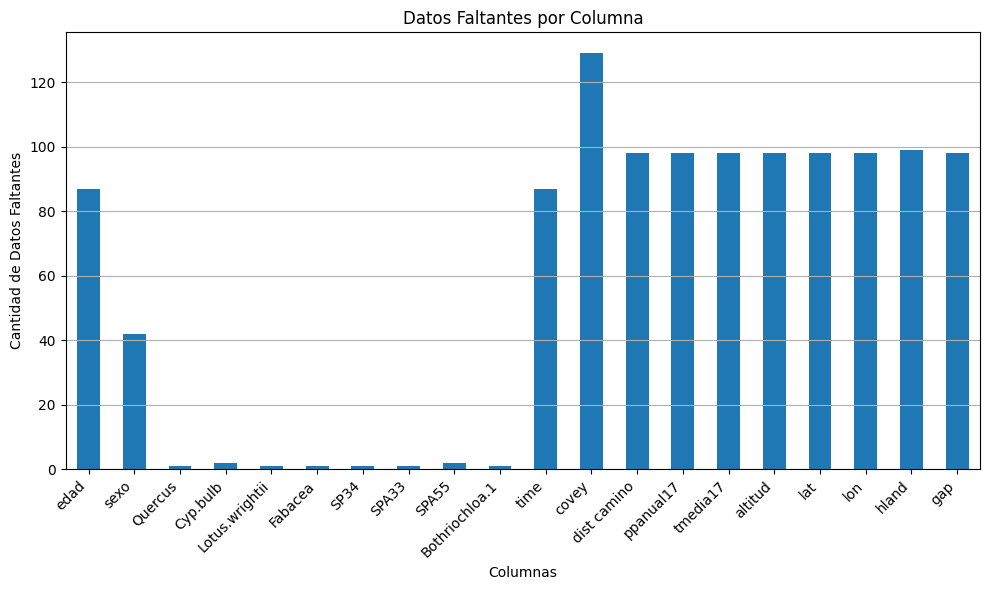

In [45]:
# Graficar los datos faltantes por columna
missing_columns.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Datos Faltantes')
plt.title('Datos Faltantes por Columna')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

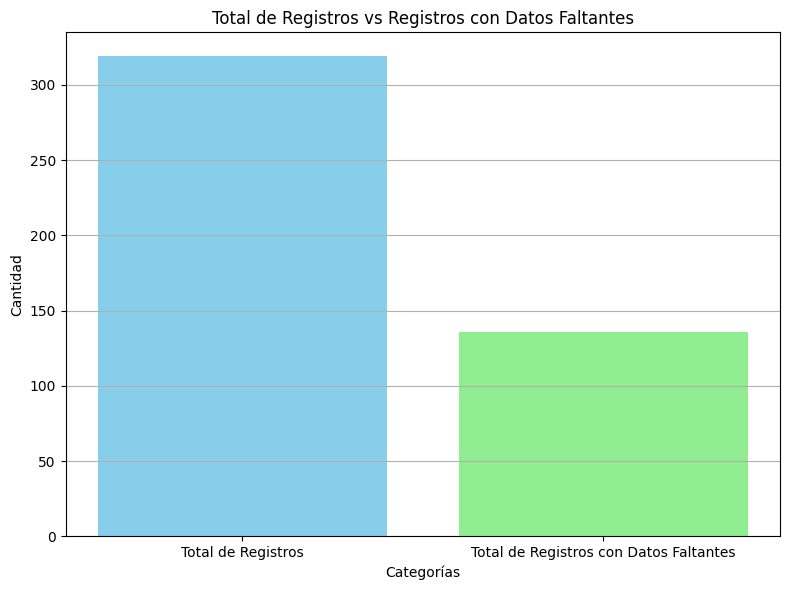

Total de Datos Faltantes: 319
Total de Registros con Datos Nulos: 136


In [49]:
# Calcular el total de datos faltantes en todo el DataFrame
total_faltantes = df.shape[0]

# Contar la cantidad de registros que tienen al menos un dato nulo en alguna columna
registros_con_nulos = df[df.isnull().any(axis=1)].shape[0]

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(['Total de Registros', 'Total de Registros con Datos Faltantes'], [total_faltantes, registros_con_nulos], color=['skyblue', 'lightgreen'])
plt.xlabel('Categorías')
plt.ylabel('Cantidad')
plt.title('Total de Registros vs Registros con Datos Faltantes')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Mostrar el total de datos faltantes y la cantidad de registros con datos nulos
print(f'Total de Datos Faltantes: {total_faltantes}')
print(f'Total de Registros con Datos Nulos: {registros_con_nulos}')


### Elementos en la dieta de la codorniz

In [27]:
print(columns[5:-11])

['Oxalis', 'Quercus', 'Cyp.bulb', 'Phaseolus', 'Tephoria', 'Caracoles', 'Insectos', 'Physalis', 'Vitis.arizonica', 'Lupinus', 'Lotus.wrightii', 'Cyp.rizo', 'Commelina.dianthifolia', 'Kallstroemia.parviflora', 'Fabacea', 'Ipomoea', 'Desmodium', 'Euphorbia probably E. bilobata', 'Talinum.aurantiacum', 'SP17', 'Heterosperma.pinnatum', 'SP19', 'Desmanthus cooleyi', 'Celtis.reticulata', 'Panicum.hirticaule', 'Setaria', 'Malvacea', 'Cyperus.fendlerianus', 'SP26', 'Setaria.1', 'SP28', 'Cryptantha.cinerea', 'Sphaeralcea.fendleri', 'Hymenopappus.flavescens', 'Solaneaceae', 'Euphorbia', 'SP34', 'Piptochaetium.fimbriatum', 'Acalypha.neomexiacana', 'Fabaceae', 'Lupinus.neomexicanus', 'Mirabilis.longiflora', 'SP44', 'Prunus.virginiana', 'SP46', 'Urochloa', 'Cyperaceae', 'Pinus.edulis', 'Fabacea.1', 'SP51', 'SP52', 'Calliandra.humilis', 'Fabaceae.1', 'Solanum', 'Calliandra.eriophylla', 'Desmanthus.cooleyi', 'Sp59', 'Croton.pottsii', 'Lupinus.1', 'Polygonaceae', 'Euphorbia.1', 'Calliandra', 'Solanum.

In [30]:
# Crear un nuevo DataFrame con las columnas especificadas
df_dieta = df[columns[5:-11]].copy()
df_dieta.head()

Oxalis  Quercus  Cyp.bulb  Phaseolus  Tephoria  Caracoles  Insectos  \
0  9.7584      0.0     0.000     0.0000    0.0000        0.0    0.0000   
1  3.9632      0.0     0.000     0.0000    0.0000        0.0    0.0000   
2  3.8238      0.0     0.000     0.6148    0.0726        0.0    0.0514   
3  3.7076      0.0     0.000     0.0000    0.0000        0.0    0.7900   
4  2.2011      0.0     0.778     0.3908    0.0000        0.0    0.0027   

   Physalis  Vitis.arizonica  Lupinus  ...  Bothriochloa.1  Euphorbia.2  \
0       0.0              0.0      0.0  ...             0.0          0.0   
1       0.0              0.0      0.0  ...             0.0          0.0   
2       0.0              0.0      0.0  ...             0.0          0.0   
3       0.0              0.0      0.0  ...             0.0          0.0   
4       0.0              0.0      0.0  ...             0.0          0.0   

   SPA60  SPA61  SPA62  Phaseolus.1  SPA64  SPA65  Arachnida  \
0    0.0    0.0    0.0          0.0    0.0    0.0        0.0   
1    0.0    0.0    0.0          0.0    0.0    0.0        0.0   
2    0.0    0.0    0.0          0.0    0.0    0.0        0.0   
3    0.0    0.0    0.0          0.0    0.0    0.0        0.0   
4    0.0    0.0    0.0          0.0    0.0    0.0        0.0   

   Juniperus prob. deppeana  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 130 columns]

In [41]:
df_dieta.describe()

Oxalis     Quercus    Cyp.bulb   Phaseolus    Tephoria   Caracoles  \
count  319.000000  318.000000  317.000000  319.000000  319.000000  319.000000   
mean     0.097181    0.391575    0.194748    0.319146    0.014456    0.000230   
std      0.681455    0.873040    0.626539    1.021837    0.054934    0.002218   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.134650    0.000000    0.091750    0.000000    0.000000   
max      9.758400    4.382100    6.723300    7.326500    0.666200    0.027800   

         Insectos    Physalis  Vitis.arizonica     Lupinus  ...  \
count  319.000000  319.000000       319.000000  319.000000  ...   
mean     0.113014    0.035234         0.008553    0.000138  ...   
std      0.384408    0.303878         0.094990    0.002000  ...   
min      0.000000    0.000000         0.000000    0.000000  ...   
25%      0.000000    0.000000         0.000000    0.000000  ...   
50%      0.000000    0.000000         0.000000    0.000000  ...   
75%      0.030000    0.000000         0.000000    0.000000  ...   
max      2.900000    4.471900         1.666400    0.034500  ...   

       Bothriochloa.1  Euphorbia.2       SPA60       SPA61       SPA62  \
count      318.000000   319.000000  319.000000  319.000000  319.000000   
mean         0.000004     0.002021    0.000029    0.000471    0.000219   
std          0.000067     0.015414    0.000418    0.004995    0.002126   
min          0.000000     0.000000    0.000000    0.000000    0.000000   
25%          0.000000     0.000000    0.000000    0.000000    0.000000   
50%          0.000000     0.000000    0.000000    0.000000    0.000000   
75%          0.000000     0.000000    0.000000    0.000000    0.000000   
max          0.001200     0.192700    0.007200    0.065500    0.029700   

       Phaseolus.1       SPA64       SPA65   Arachnida  \
count   319.000000  319.000000  319.000000  319.000000   
mean      0.000291    0.001678    0.000022    0.000483   
std       0.004302    0.027182    0.000392    0.008622   
min       0.000000    0.000000    0.000000    0.000000   
25%       0.000000    0.000000    0.000000    0.000000   
50%       0.000000    0.000000    0.000000    0.000000   
75%       0.000000    0.000000    0.000000    0.000000   
max       0.074700    0.482800    0.007000    0.154000   

       Juniperus prob. deppeana  
count                319.000000  
mean                   0.000013  
std                    0.000230  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    0.000000  
max                    0.004100  

[8 rows x 130 columns]

### Variables Climatologicas y del individuo

In [26]:
print(columns[:5] + columns[-11:])

['id', 'edad', 'sexo', 'estado', 'peso total', 'time', 'covey', 'dist camino', 'ppanual17', 'tmedia17', 'altitud', 'lat', 'lon', 'hcrop', 'hland', 'gap']


In [32]:
# Crear una lista con las columnas 
nuevas_columnas = columns[:5] + columns[-11:]

# Crear un nuevo DataFrame con las columnas especificadas
df_all = df[nuevas_columnas].copy()

In [33]:
df_all.head()

id edad    sexo estado  peso total    time  covey  dist camino  \
0  2014-104    J  Female     NM      9.7584  1420.0    6.0       251.86   
1  2014-105    J    Male     NM      3.9632  1420.0    6.0       251.86   
2  2016-133    A  Female     AZ      5.4562  1700.0   10.0       574.06   
3   2014-28    J  Female     NM      4.4976  1610.0    8.0        23.07   
4  2016-132    J    Male     AZ      5.4630  1600.0    8.0       236.76   

   ppanual17   tmedia17  altitud        lat         lon     hcrop     hland  \
0      462.0   7.054167   2518.0  34.037969 -108.963777  0.000000  0.798600   
1      462.0   7.054167   2518.0  34.037969 -108.963777  0.000000  0.798600   
2      515.0  15.954167   1527.0  31.375725 -110.530491  0.785803  1.245916   
3      385.0  10.979167   1952.0  33.176791 -107.735593  0.464732  0.764466   
4      521.0  16.133333   1507.0  31.353053 -110.531060  1.680150  1.541562   

                                           gap  
0       Rocky Mountain Ponderosa Pine Woodland  
1       Rocky Mountain Ponderosa Pine Woodland  
2                              Madrean Encinal  
3     Colorado Plateau Pinyon-Juniper Woodland  
4  Apacherian-Chihuahuan Mesquite Upland Scrub

In [42]:
df_all.describe()

peso total         time       covey  dist camino   ppanual17  \
count  319.000000   232.000000  190.000000   221.000000  221.000000   
mean     2.084231  1327.995690    9.178947   207.466742  436.755656   
std      1.718818   227.468822    3.779586   178.331358   78.965781   
min      0.000000   835.000000    1.000000     6.400000  235.000000   
25%      0.704350  1130.000000    6.000000    81.820000  376.000000   
50%      1.776000  1365.000000   10.000000   171.920000  422.000000   
75%      3.001150  1530.000000   12.000000   272.860000  518.000000   
max      9.758400  1700.000000   20.000000   774.840000  620.000000   

         tmedia17      altitud         lat         lon       hcrop       hland  
count  221.000000   221.000000  221.000000  221.000000  319.000000  220.000000  
mean    13.860351  1709.475113   32.221751 -108.935298    0.645314    1.044265  
std      2.093009   224.818989    0.815692    1.534481    0.528932    0.360545  
min      7.054167  1206.000000   31.343850 -111.072099    0.000000    0.222691  
25%     12.379167  1567.000000   31.479233 -110.585248    0.181204    0.783493  
50%     14.354167  1658.000000   31.791366 -108.940734    0.579030    1.057318  
75%     15.537500  1901.000000   32.894714 -107.723281    0.963353    1.362937  
max     17.312500  2518.000000   34.037969 -105.354701    2.318525    1.796301